# **READ ME**
  * Made By:
    * Ryan Teoh (CPSC 483-01)
    * Marco Botello (CPSC 483-01)
  * Description:
     * This notebook will be using dataset1.csv,dataset2.csv,and dataset3.csv. We will take these datasets and apply several classifiers to them and compare their graphs as well as their scores to see what differences we can see between them.

# 1.) Use read_csv() to load and examine each dataset.

In [1]:
import numpy as np
import pandas as pd

columnNames=['a','b','c']
print("Dataset1:")
set1 = pd.read_csv('dataset1.csv', names=columnNames)
print(set1,"\n")

print("Dataset2:")
set2 = pd.read_csv('dataset2.csv', names=columnNames)
print(set2,"\n")

print("Dataset3:")
set3 = pd.read_csv('dataset3.csv', names=columnNames)
print(set3)

Dataset1:
             a          b  c
0     1.800539  -0.539218  0
1    24.330831  26.439146  1
2    21.124114  21.166814  1
3    10.517197  11.175424  0
4    19.737721  23.341138  1
..         ...        ... ..
195   7.701944   5.303327  0
196  24.079743  24.066883  1
197  24.351346  20.908176  1
198  24.688063  24.996258  1
199  36.190529  18.514561  1

[200 rows x 3 columns] 

Dataset2:
             a          b  c
0    -1.664407  17.245415  0
1    20.211237   8.599145  1
2    12.675218  23.148375  1
3    17.552831  10.311698  1
4    14.959941  20.225844  1
..         ...        ... ..
195  14.648641  18.261043  1
196  15.618267  10.398619  1
197  18.280171   9.001519  1
198  13.415497   6.349741  1
199   5.702577  25.346361  0

[200 rows x 3 columns] 

Dataset3:
             a          b  c
0    30.876149   7.806793  0
1    34.060953  14.802478  0
2    30.860440  16.270849  0
3    21.738646  10.306756  1
4    17.664476  30.921761  1
..         ...        ... ..
195   8.029149  17.

# 2.) Use logistic regression to fit() and score() a binary classifier for dataset 1. 

In [2]:
from sklearn.linear_model import LogisticRegression

#Set X to be the first two columns
X = pd.read_csv('dataset1.csv', names=columnNames, usecols = ['a','b'])

#Set y to be the last column
y = pd.read_csv('dataset1.csv',names=columnNames, usecols = ['c'])

#Make the column into a vector
y = y.to_numpy().flatten()

#Declare model type and fit it
model = LogisticRegression(solver='liblinear', random_state=0).fit(X,y)

print("Logistic Regression on Dataset1 score: ",model.score(X,y))

Logistic Regression on Dataset1 score:  1.0


# How accurate are the model’s predictions?
## Since the score is 1.0 the model's predictions are very accurate.

# 3.) Repeat experiment (2) for dataset 2. 

In [3]:
#Set X to be the first two columns
X2 = pd.read_csv('dataset2.csv', names=columnNames, usecols = ['a','b'])

#Set y to be the last column
y2 = pd.read_csv('dataset2.csv',names=columnNames, usecols = ['c'])

#Make the column into a vector
y2 = y2.to_numpy().flatten()

#Declare model type and fit it
model = LogisticRegression(solver='liblinear', random_state=0).fit(X2,y2)

print("Logistic Regression on Dataset2 score:",model.score(X2,y2))

Logistic Regression on Dataset2 score: 0.525


# How well does it score?
## This model seems to score about half as well as it did when it was applied to dataset1.

# 4.) Create separate scatterplots for datasets 1 and 2, plotting points from class 0 with a different color and marker from points in class 1.

Dataset1 Scatter:


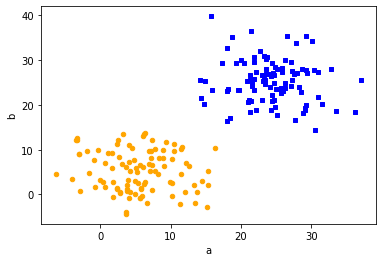


Dataset2 Scatter:


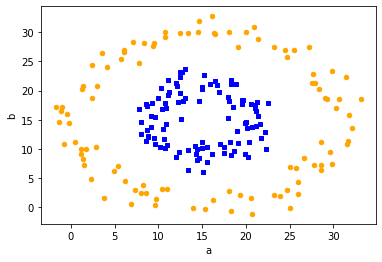

In [4]:
import matplotlib
import matplotlib.pyplot as plt

#Declare colors and shapes to differentiate data
colors = {0:'orange', 1:'blue'}
shape = {0:'o', 1:'s'}

#Make subplots to split up the data basses on it's class for dataset1
print("Dataset1 Scatter:")
fig, ax = plt.subplots()
grouped = set1.groupby('c')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter',x='a', y='b', color=colors[key], marker=shape[key])
plt.show()

#Make subplots to split up the data basses on it's class for dataset1
print("\nDataset2 Scatter:")
fig, ax = plt.subplots()
grouped = set2.groupby('c')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter',x='a', y='b', color=colors[key], marker=shape[key])
plt.show()

 # What accounts for the discrepancies between experiments (2) and (3)?
 ## In experiment (2) it was easier to predict because the classes were clustered around two particular portions of the graph. Meanwhile in (3), one cluster is within another which makes it harder to predict.

# 5.) Fit and score Gaussian Naive Bayes classifiers for datasets 1 and 2. 

In [9]:
from sklearn.naive_bayes import GaussianNB

#Fit model to dataset1
gaussianModel = GaussianNB().fit(X,y)
print("Dataset 1 Gaussian Score: ",gaussianModel.score(X,y))

#Fit model to dataset2
gaussianModel = GaussianNB().fit(X2,y2)
print("\nDataset 2 Gaussian Score: ",gaussianModel.score(X2,y2))

Dataset 1 Gaussian Score:  1.0

Dataset 2 Gaussian Score:  1.0


# How well do these classifiers score compared to logistic regression?
## These classifiers score better than using logistic regression because both datasets are now at a score of 1.

# 6.)Repeat experiment (5) with K-Nearest Neighbor classifiers.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kNModel = KNeighborsClassifier().fit(X,y)
print("Dataset 1 K-Nearest Neighbor Score: ",kNModel.score(X,y))

kNModel = KNeighborsClassifier().fit(X2,y2)
print("\nDataset 2 K-Nearest Neighbor Score: ",kNModel.score(X2,y2))

Dataset 1 K-Nearest Neighbor Score:  1.0

Dataset 2 K-Nearest Neighbor Score:  1.0


# 7) Use the code from KV Subbaiah Setty’s tutorial How To Plot A Decision Boundary For Machine Learning Algorithms in Python as a guide, plot the decision boundaries for each classifier and dataset. 


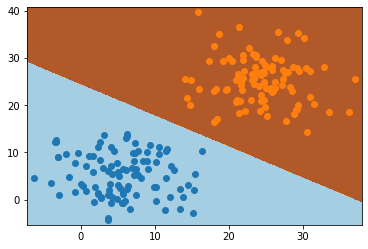

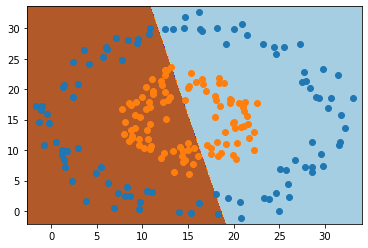

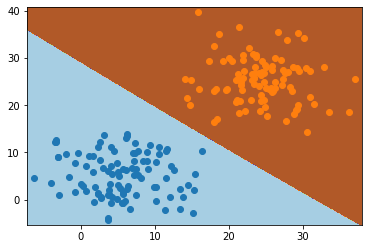

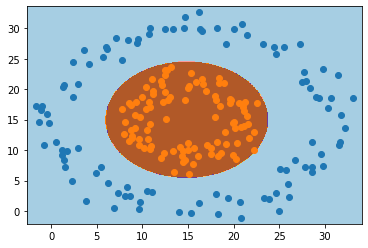

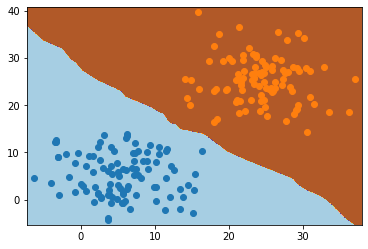

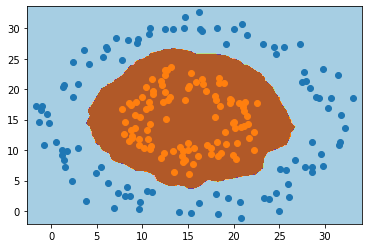

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

def plot_boundary(X, y, model):
    
    # Define new plot
    fig, ax = plt.subplots()
    
    # Get min and max of the domain
    min1, max1 = X['a'].min()-1, X['a'].max()+1
    min2, max2 = X['b'].min()-1, X['b'].max()+1

    # Define x and y scale
    X1grid = np.arange(min1, max1, 0.1)
    X2grid = np.arange(min2, max2, 0.1)

    # Generate the grid's lines and rows
    XX, YY = np.meshgrid(X1grid, X2grid)

    # Flatten the grid
    r1, r2 = XX.flatten(), YY.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # Horizontally stack the vectors inorder to create the x1 and x2 input
    grid = np.hstack((r1,r2))

    # Fit the model
    model.fit(X, y)

    # Predict the grid
    yHat = model.predict(grid)

    # Reshape the predictions
    ZZ = yHat.reshape(XX.shape)

    # Plot XX, YY, and ZZ
    plt.contourf(XX, YY, ZZ, cmap='Paired')

    # Create scatter plot for each class
    for class_value in range(2):

        # Get row indexes for the samples
        row_ix = np.where(y == class_value)

        # Create scatter for the samples
        ax.scatter(X['a'].values[row_ix], X['b'].values[row_ix], cmap='Paired')

#Apply logistic classifier
plot_boundary(X, y,model = LogisticRegression())
plot_boundary(X2, y2,model = LogisticRegression())

#Apply Gaussian classifier
plot_boundary(X, y,model = GaussianNB())
plot_boundary(X2, y2,model = GaussianNB())

#Apply K-Nearest Classifier
plot_boundary(X, y,model = KNeighborsClassifier())
plot_boundary(X2, y2,model = KNeighborsClassifier())

# What differences do you observe?
## Between the Logistic and Gaussian, dataset1 looks nearly the same but when you compare dataset2 you can clearly see that Gaussian scored better because it could define the boundary of the clusters more efficiently. From Gaussian to K-Nearest Neighbor we see that the same improvement was made, but K-Nearest Neighbors is even more refined. The boundaries are not so static anymore and give an even more accurate representation of the data.

# 8) Now repeat experiments (2), (5), (6), and (7) with dataset 3.  

Logistical Model score:  0.855
Gaussian Model Score:  0.885
K-Nearest Neigbor Score:  1.0


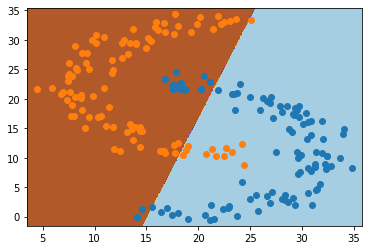

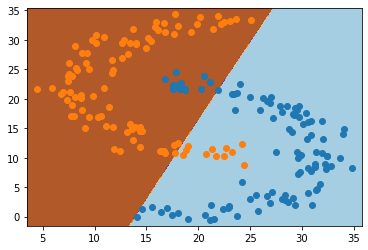

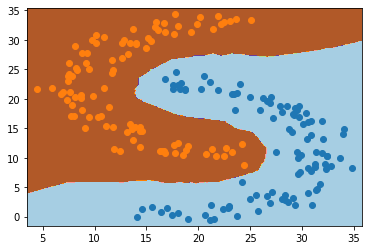

In [12]:
X3 = pd.read_csv('dataset3.csv', names=columnNames, usecols = ['a','b'])
# print(X3)

y3 = pd.read_csv('dataset3.csv',names=columnNames, usecols = ['c'])
y3 = y3.to_numpy().flatten()
# print(y3)

Logmodel = LogisticRegression(solver='liblinear', random_state=0).fit(X3,y3)
print("Logistical Model score: ",Logmodel.score(X3,y3))

gaussianModel = GaussianNB().fit(X3,y3)
print("Gaussian Model Score: ",gaussianModel.score(X3,y3))

kNModel = KNeighborsClassifier().fit(X3,y3)
print("K-Nearest Neigbor Score: ",kNModel.score(X3,y3))


#Apply logistic classifier
plot_boundary(X3, y3,model = LogisticRegression())


#Apply Gaussian classifier
plot_boundary(X3, y3,model = GaussianNB())
#Apply K-Nearest Classifier

plot_boundary(X3, y3,model = KNeighborsClassifier())
